# Problem Statement

### Business Use Case

There has been a revenue decline for a Portuguese bank and they would like to know what actions to take. After investigation, they found out that the root cause is that their clients are not depositing as frequently as before. Knowing that term deposits allow banks to hold onto a deposit for a specific amount of time, so banks can invest in higher gain financial products to make a profit. In addition, banks also hold better chance to persuade term deposit clients into buying other products such as funds or insurance to further increase their revenues. As a result, the Portuguese bank would like to identify existing clients that have higher chance to subscribe for a term deposit and focus marketing efforts on such clients.

### Problem Statement

Predict if the client will subscribe to a term deposit based on the analysis of the marketing campaigns the bank performed.

### Evaluation Metric
We will be using ROC-AUC score for evaluation. 


## Import necessary models and libraries

Importing libraries, metrics, models to build different machine learning algorithms

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
from sklearn.preprocessing import LabelEncoder,MinMaxScaler,StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier ,RandomForestClassifier ,GradientBoostingClassifier
from xgboost import XGBClassifier 
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.linear_model import Ridge,Lasso
from sklearn.metrics import roc_auc_score ,mean_squared_error,accuracy_score,classification_report,roc_curve,confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn import metrics
import warnings
warnings.filterwarnings('ignore')
from scipy.stats.mstats import winsorize
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split
pd.set_option('display.max_columns',None)

## Load data set and understand the data

We load the data set, view the data, understand it and interpret the different changes that will be necessary to make the dataset fit for building machine learning models

In [3]:
import os
os.getcwd()

'C:\\Users\\Mrunal\\Documents\\Bank Marketing Analysis'

In [4]:
path = 'C:\\Users\\Mrunal\\Documents\\Bank Marketing Analysis\\train.csv'

df = pd.read_csv(path)

df.drop('Id',axis=1, inplace=True)

df.head(10)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,49,blue-collar,married,basic.9y,unknown,no,no,cellular,nov,wed,227,4,999,0,nonexistent,-0.1,93.200,-42.0,4.120,5195.8,no
1,37,entrepreneur,married,university.degree,no,no,no,telephone,nov,wed,202,2,999,1,failure,-0.1,93.200,-42.0,4.120,5195.8,no
2,78,retired,married,basic.4y,no,no,no,cellular,jul,mon,1148,1,999,0,nonexistent,-1.7,94.215,-40.3,0.870,4991.6,yes
3,36,admin.,married,university.degree,no,yes,no,telephone,may,mon,120,2,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,59,retired,divorced,university.degree,no,no,no,cellular,jun,tue,368,2,999,0,nonexistent,-2.9,92.963,-40.8,1.262,5076.2,no
5,29,admin.,single,university.degree,no,no,no,cellular,aug,wed,256,2,999,0,nonexistent,1.4,93.444,-36.1,4.964,5228.1,no
6,26,student,single,basic.9y,no,no,no,telephone,aug,wed,449,1,999,0,nonexistent,-2.9,92.201,-31.4,0.879,5076.2,yes
7,30,blue-collar,married,basic.4y,no,yes,no,cellular,nov,wed,126,2,999,0,nonexistent,-0.1,93.200,-42.0,4.120,5195.8,no
8,50,blue-collar,married,basic.4y,unknown,no,no,telephone,may,fri,574,1,999,0,nonexistent,1.1,93.994,-36.4,4.864,5191.0,no
9,33,admin.,single,high.school,no,yes,no,cellular,jul,tue,498,5,999,0,nonexistent,1.4,93.918,-42.7,4.961,5228.1,no


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32950 entries, 0 to 32949
Data columns (total 21 columns):
age               32950 non-null int64
job               32950 non-null object
marital           32950 non-null object
education         32950 non-null object
default           32950 non-null object
housing           32950 non-null object
loan              32950 non-null object
contact           32950 non-null object
month             32950 non-null object
day_of_week       32950 non-null object
duration          32950 non-null int64
campaign          32950 non-null int64
pdays             32950 non-null int64
previous          32950 non-null int64
poutcome          32950 non-null object
emp.var.rate      32950 non-null float64
cons.price.idx    32950 non-null float64
cons.conf.idx     32950 non-null float64
euribor3m         32950 non-null float64
nr.employed       32950 non-null float64
y                 32950 non-null object
dtypes: float64(5), int64(5), object(11)
memory usa

In [6]:
df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,32950.000000,32950.000000,32950.000000,32950.000000,32950.000000,32950.000000,32950.000000,32950.000000,32950.000000,32950.000000
mean,40.014112,258.127466,2.560607,962.052413,0.174719,0.080470,93.575881,-40.508489,3.618395,5166.899651
std,10.403636,258.975917,2.752326,187.951096,0.499025,1.571266,0.579209,4.628223,1.735896,72.434812
min,17.000000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.000000,103.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.000000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.000000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.000000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [7]:
df.shape

(32950, 21)

## Create a dataset dictionary

We create a dataset dictionary to understand the number, type and description of the features we are dealing with.
We take the transpose of the dataset to look at all the features.

In [8]:
df.head().T

,0,1,2,3,4
age,49,37,78,36,59
job,blue-collar,entrepreneur,retired,admin.,retired
marital,married,married,married,married,divorced
education,basic.9y,university.degree,basic.4y,university.degree,university.degree
default,unknown,no,no,no,no
housing,no,no,no,yes,no
loan,no,no,no,no,no
contact,cellular,telephone,cellular,telephone,cellular
month,nov,nov,jul,may,jun
day_of_week,wed,wed,mon,mon,tue


### Data dictionary

#### Input variables:

1. age: (numeric)
2. job : type of job (categorical: ‘admin.’,’blue collar’,’entrepreneur’,’housemaid’,’management’,’retired’,’self-employed’,’services’,’student’,’technician’,’unemployed’,’unknown’)
3. marital : marital status (categorical: ‘divorced’,’married’,’single’,’unknown’; note: ‘divorced’ means divorced or widowed)
4. education (categorical: ‘basic.4y’,’basic.6y’,’basic.9y’,’high.school’,’illiterate’,’professional.course’,’university.degree’,’unknown’)
5. default: has credit in default? (categorical: ‘no’,’yes’,’unknown’)
6. housing: has housing loan? (categorical: ‘no’,’yes’,’unknown’)
7. loan: has personal loan? (categorical: ‘no’,’yes’,’unknown’
8. contact: contact communication type (categorical: ‘cellular’,’telephone’)
9. month: last contact month of year (categorical: ‘jan’, ‘feb’, ‘mar’, …, ‘nov’, ‘dec’)
10. day_of_week: last contact day of the week (categorical: ‘mon’,’tue’,’wed’,’thu’,’fri’)
11. duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y=’no’). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.
12. campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
13. pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
14. previous: number of contacts performed before this campaign and for this client (numeric)
15. poutcome: outcome of the previous marketing campaign (categorical: ‘failure’,’nonexistent’,’success’) social and economic context attributes
16. emp.var.rate: employment variation rate — quarterly indicator (numeric)
17. cons.price.idx: consumer price index — monthly indicator (numeric)
18. cons.conf.idx: consumer confidence index — monthly indicator (numeric)
19. euribor3m: euribor 3-month rate — daily indicator (numeric)
20. nr.employed: number of employees — quarterly indicator (numeric)

#### Target variables:
1. y: Has the client subscribed to term deposit or not

## Checking unique values in the data set

We check the different features and their unique values using a for loop

In [9]:
for i in df.columns:
    print(i)
    print(df[i].unique())
    print('-----'*15)

age
[49 37 78 36 59 29 26 30 50 33 44 32 43 56 40 47 34 46 39 41 55 38 63 23
 48 53 35 51 71 58 21 45 25 77 28 52 80 57 22 60 27 24 31 42 54 81 64 79
 20 76 82 19 68 65 73 66 85 74 61 86 69 18 83 88 70 87 84 75 62 72 67 89
 17 91 98]
---------------------------------------------------------------------------
job
['blue-collar' 'entrepreneur' 'retired' 'admin.' 'student' 'services'
 'technician' 'self-employed' 'management' 'unemployed' 'unknown'
 'housemaid']
---------------------------------------------------------------------------
marital
['married' 'divorced' 'single' 'unknown']
---------------------------------------------------------------------------
education
['basic.9y' 'university.degree' 'basic.4y' 'high.school'
 'professional.course' 'unknown' 'basic.6y' 'illiterate']
---------------------------------------------------------------------------
default
['unknown' 'no' 'yes']
---------------------------------------------------------------------------
housing
['no' 'yes' 'unkno

In [ ]:
def missing_data(dataset):
    total = dataset.isnull().sum().sort_values(ascending=False)
    percent = (dataset.isnull().sum()/dataset.isnull().count()).sort_values(ascending=False)
    missing_data = pd.concat([total,percent],axis=1, keys=['Total','Percent'])
    return missing_data



## Check for null and duplicated values

Checking for any null or duplicated values.
The null values / duplicated values can be dropped in order to clean the dataset efficiently.

In [10]:
total = df.isnull().sum()
print(total)

percent = (df.isnull().sum()/df.isnull().count())
print(percent)

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64
age               0.0
job               0.0
marital           0.0
education         0.0
default           0.0
housing           0.0
loan              0.0
contact           0.0
month             0.0
day_of_week       0.0
duration          0.0
campaign          0.0
pdays             0.0
previous          0.0
poutcome          0.0
emp.var.rate      0.0
cons.price.idx    0.0
cons.conf.idx     0.0
euribor3m         0.0
nr.employed       0.0
y                 0.0
dtype: float64


In [11]:
if len(df[df.duplicated()]) > 0:
    print("No. of duplicated entries: ", len(df[df.duplicated()]))
    print(df[df.duplicated(keep=False)].sort_values(by=list(df.columns)).head())
else:
    print("No duplicated entries found")

No. of duplicated entries:  8
       age      job  marital          education default housing loan  \
5861    35   admin.  married  university.degree      no     yes   no   
20067   35   admin.  married  university.degree      no     yes   no   
6257    36  retired  married            unknown      no      no   no   
12252   36  retired  married            unknown      no      no   no   
1577    39   admin.  married  university.degree      no      no   no   

         contact month day_of_week  duration  campaign  pdays  previous  \
5861    cellular   may         fri       348         4    999         0   
20067   cellular   may         fri       348         4    999         0   
6257   telephone   jul         thu        88         1    999         0   
12252  telephone   jul         thu        88         1    999         0   
1577    cellular   nov         tue       123         2    999         0   

          poutcome  emp.var.rate  cons.price.idx  cons.conf.idx  euribor3m  \
5861   n

## Here we can see that there are no null values, but there are duplicated values

We drop duplicated values as follows

In [12]:
df.drop_duplicates(inplace=True)

df.shape

(32942, 21)

## Numerical and categorical data

Here we look to understand the numerical and categorical features
We work on them to make a cleaner dataset by looking for missing data, null values, outliers, data imbalance etc.

In [13]:
#Numerical features

numerical_data = df.select_dtypes(include='number')
print('Numerical features in the dataset include:\n',numerical_data)

numerical_col = numerical_data.columns
numerical_col

Numerical features in the dataset include:
        age  duration  campaign  pdays  previous  emp.var.rate  cons.price.idx  \
0       49       227         4    999         0          -0.1          93.200   
1       37       202         2    999         1          -0.1          93.200   
2       78      1148         1    999         0          -1.7          94.215   
3       36       120         2    999         0           1.1          93.994   
4       59       368         2    999         0          -2.9          92.963   
...    ...       ...       ...    ...       ...           ...             ...   
32945   28       192         1    999         0          -1.7          94.215   
32946   52        64         1    999         1          -0.1          93.200   
32947   54       131         4    999         0           1.4          93.918   
32948   29       165         1    999         0           1.1          93.994   
32949   35       544         3    999         0           1.4    

Index(['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate',
       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed'],
      dtype='object')

We see the presence of null values in the numerical features, we impute them to fill null values with mean / median values.

In [14]:
for i in numerical_col:
    median = df[i].median()
    df[i].fillna(median, inplace=True)

## Class imbalance in the target

We need to check for any class imbalances in target variable. 
If the observations belonging to one class is larger in number as compared to the other, it results in a model with more bias towards the majority class.

In [15]:
df['y'].value_counts()

no     29230
yes     3712
Name: y, dtype: int64

In [16]:
(df['y'].value_counts() / df['y'].value_counts().sum())*100

no     88.73171
yes    11.26829
Name: y, dtype: float64

### We see that here there is a large degree of imbalance in the data. Most machine learning algorithms assume that the data is normally distributed, causing bias towards majority data.

We can deal with it by using undersampling techniques such as - random, clustercentroid, tomeklinks or using oversampling techniques such as - random and SMOTE

Here we will be using SMOTE during model implementation.

### Checking for outliers

We need to treat outliers as they may affect model performance.

In [17]:
cols = df.columns

outliers = pd.DataFrame(columns=['Features','Number of outliers'])

for col in numerical_col:
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    IQR = q3 - q1
    
    low_limit = q1 - (1.5*IQR)
    up_limit = q3 + (1.5*IQR)
    
    total_outliers = df[(df[col]<low_limit) | (df[col]>up_limit)].shape[0]
    
    outliers = outliers.append({'Features':col, 'Number of outliers':total_outliers}, ignore_index=True)

outliers

,Features,Number of outliers
0,age,367
1,duration,2366
2,campaign,1916
3,pdays,1226
4,previous,4534
5,emp.var.rate,0
6,cons.price.idx,0
7,cons.conf.idx,358
8,euribor3m,0
9,nr.employed,0


## Dealing with Numerical data

We visualize different Numerical features to analyze their impact on the dataset

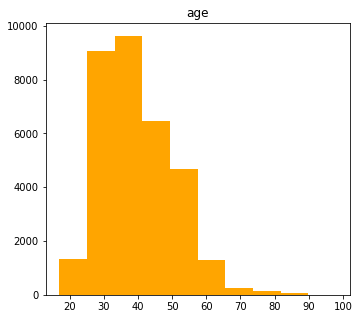

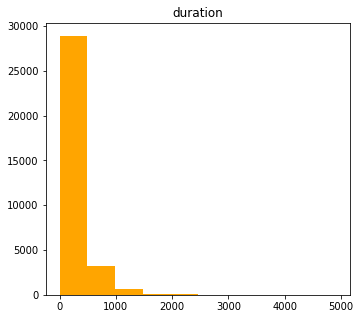

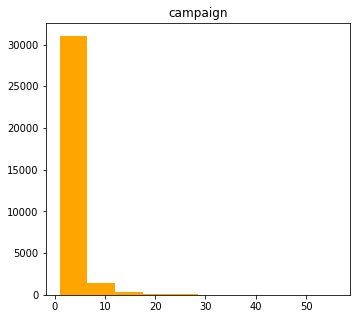

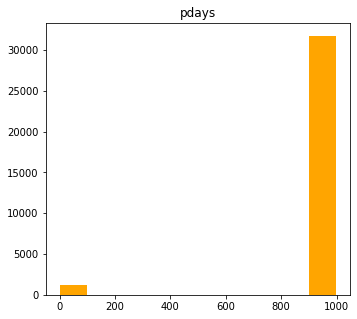

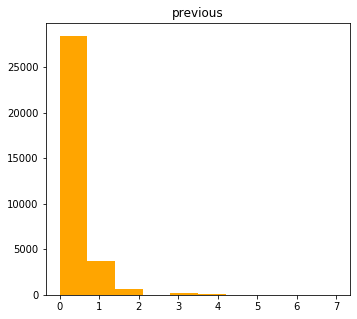

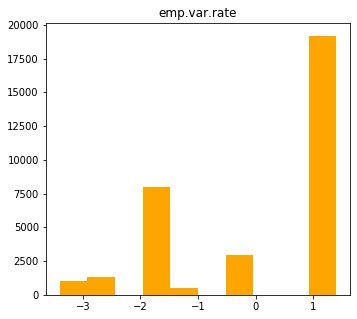

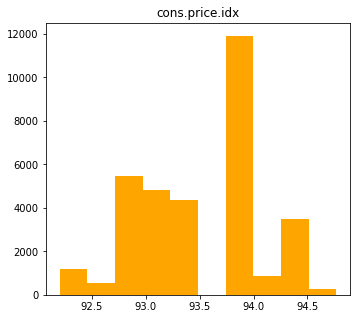

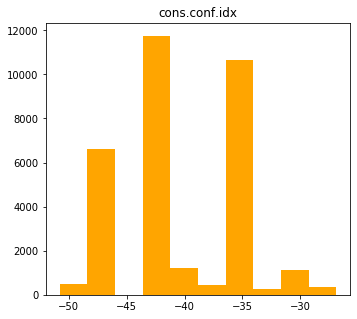

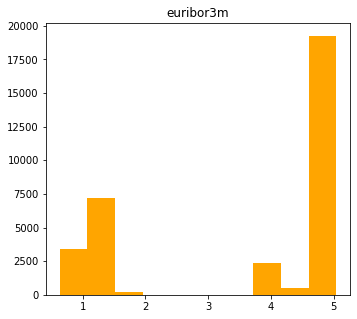

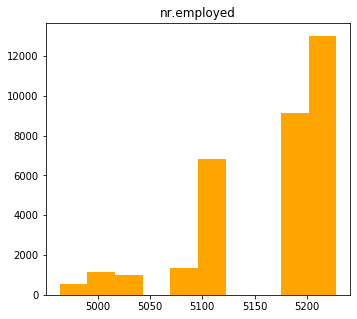

In [18]:
for i in numerical_col:
    plt.figure(figsize=(12,5))
    plt.subplot(121)
    plt.hist(df[i], color='orange')
    plt.title(i)

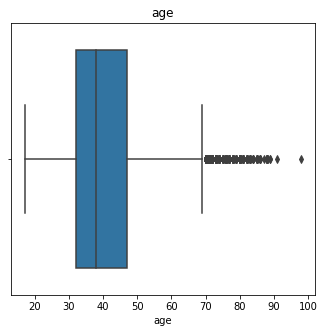

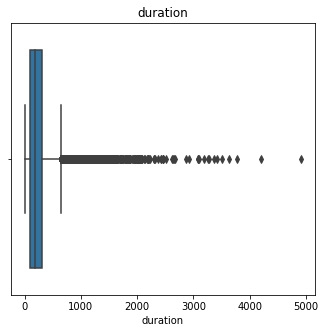

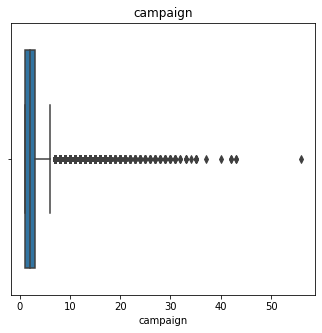

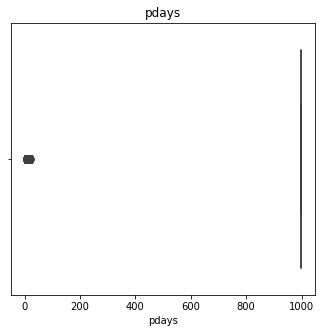

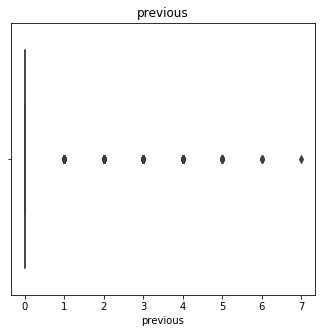

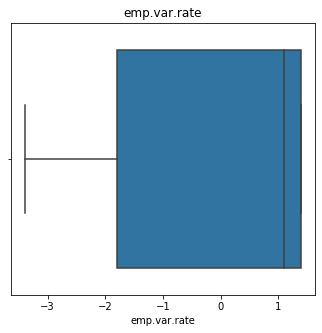

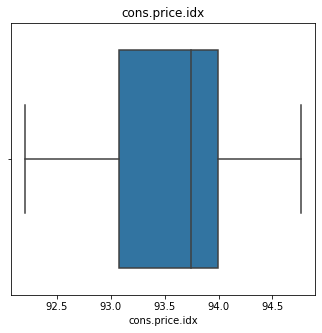

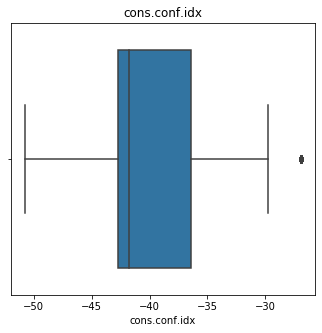

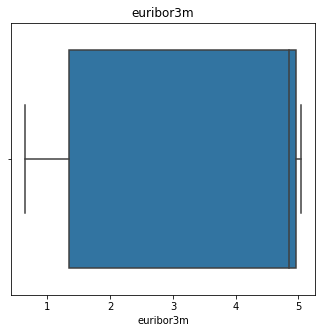

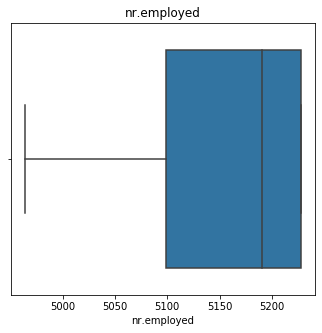

In [19]:
for i in numerical_col:
    plt.figure(figsize=(12,5))
    plt.subplot(121)
    sns.boxplot(df[i])
    plt.title(i)

## Observation

- As we can see from the histogram, the features `age`, `duration` and `campaign` are heavily skewed and this is due to the presence of outliers as seen in the boxplot for these features. We will deal with these outliers in the steps below.
- Looking at the plot for `pdays`, we can infer that majority of the customers were being contacted for the first time because as per the feature description for `pdays` the value 999 indicates that the customer had not been contacted previously. 
- Since the features `pdays` and `previous` consist majorly only of a single value, their variance is quite less and hence we can drop them since technically will be of no help in prediction.

## Treating outliers in the continuous columns

Outliers can be treated in a variety of ways. It depends on the skewness of the feature.
To reduce right skewness, we use roots or logarithms or reciprocals (roots are weakest). This is the most common problem in practice.
To reduce left skewness, we take squares or cubes or higher powers.
But in our data, some of the features have negative values and also the value 0. In such cases, square root transform or logarithmic transformation cannot be used since we cannot take square root of negative values and logarithm of zero is not defined.
Hence for this data we use a method called Winsorization. In this method we define a confidence interval of let's say 90% and then replace all the outliers below the 5th percentile with the value at 5th percentile and all the values above 95th percentile with the value at the 95th percentile. It is pretty useful when there are negative values and zeros in the features which cannot be treated with log transforms or square roots.

In [20]:
for col in numerical_col:    
    df[col] = winsorize(df[col], limits=[0.05, 0.1],inclusive=(True, True))

In [21]:
df.drop(['pdays','previous'],1,inplace=True)

In [22]:
#Categorical features

categorical_data = df.select_dtypes(include='object')
print('Categorical features in the dataset include: \n',categorical_data)

categorical_col = categorical_data.columns
categorical_col

Categorical features in the dataset include: 
                 job   marital            education  default housing loan  \
0       blue-collar   married             basic.9y  unknown      no   no   
1      entrepreneur   married    university.degree       no      no   no   
2           retired   married             basic.4y       no      no   no   
3            admin.   married    university.degree       no     yes   no   
4           retired  divorced    university.degree       no      no   no   
...             ...       ...                  ...      ...     ...  ...   
32945      services    single          high.school       no     yes   no   
32946    technician   married  professional.course       no     yes   no   
32947        admin.   married             basic.9y       no      no  yes   
32948        admin.   married    university.degree       no      no   no   
32949        admin.   married    university.degree       no      no  yes   

         contact month day_of_week     p

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'day_of_week', 'poutcome', 'y'],
      dtype='object')

In [23]:
print(df.dtypes)

age                 int64
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
duration            int64
campaign            int64
poutcome           object
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
y                  object
dtype: object


## Dealing with Categorical data

We visualize different categorical features to analyze their impact on the dataset

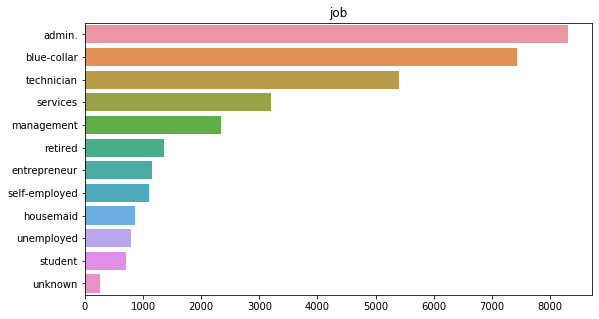

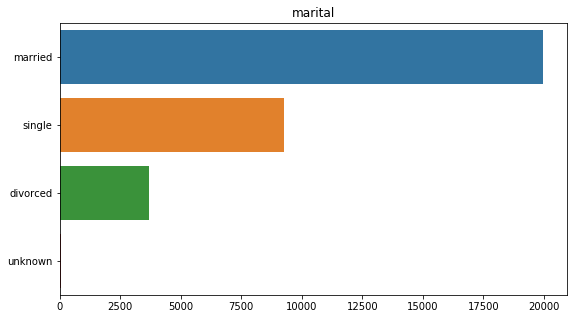

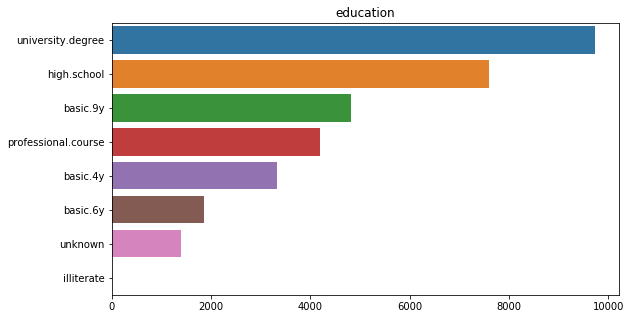

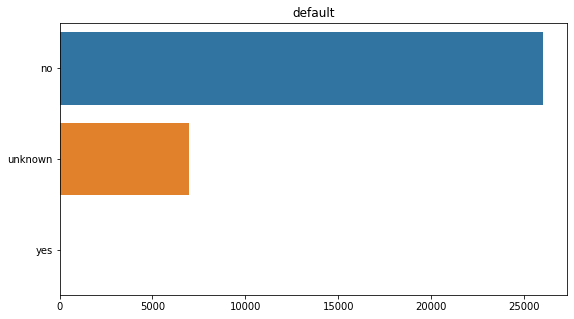

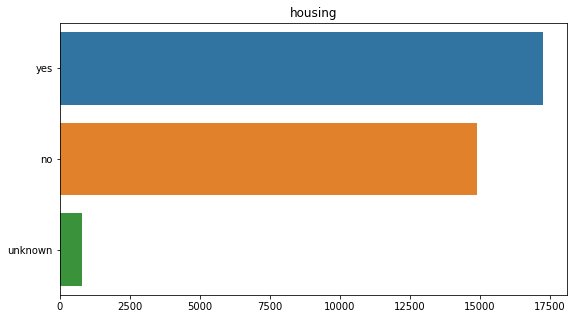

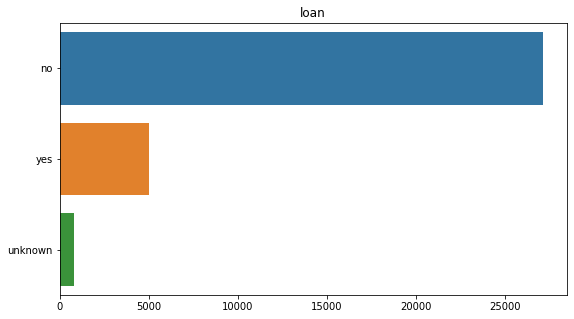

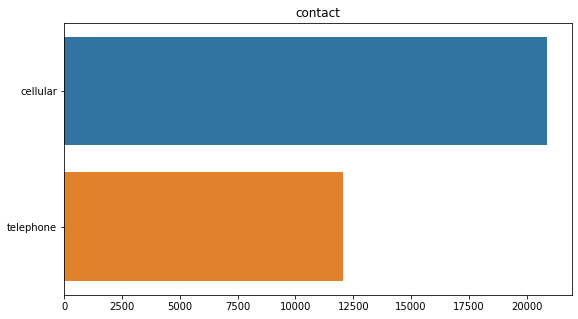

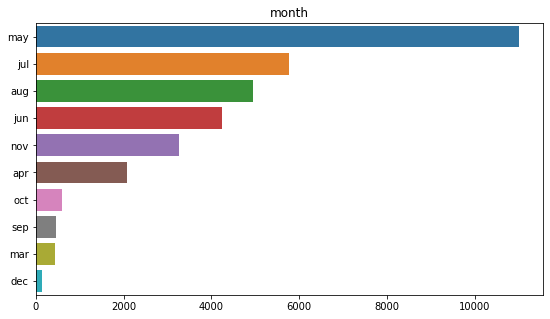

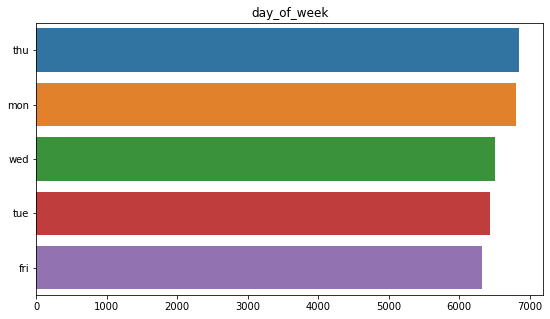

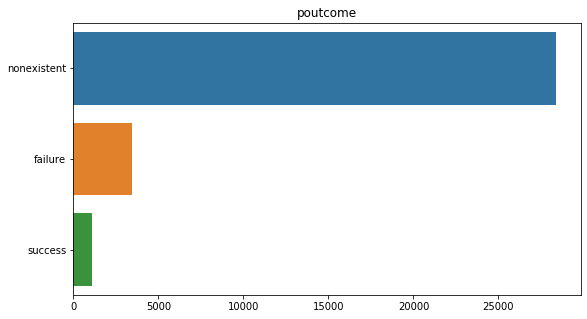

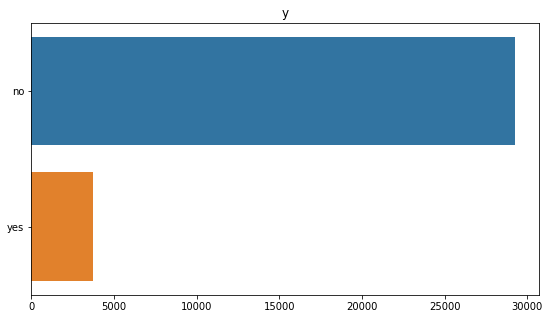

In [24]:
#Univariate

for col in categorical_col:
    plt.figure(figsize = (20,5))
    plt.subplot(121)
    sns.barplot(df[col].value_counts().values, df[col].value_counts().index)
    plt.title(col)

### Observations :

From the above visuals, we can make the following observations: 
- The top three professions that our customers belong to are - administration, blue-collar jobs and technicians.
- A huge number of the customers are married.
- Majority of the customers do not have a credit in default
- Many of our past customers have applied for a housing loan but very few have applied for personal loans.
- Cell-phones seem to be the most favoured method of reaching out to customers.
- Many customers have been contacted in the month of **May**.
- The plot for the target variable shows heavy imbalance in the target variable. 
- The missing values in some columns have been represented as `unknown`. `unknown` represents missing data. In the next task, we will treat these values.  

### Imputing `unknown` values of categorical columns 

We have seen some categorical variables have a value called `unknown`. `unknown` values are a kind of missing data.
Depending on the use case, we can decide how to deal with these values. One method is to directly impute them with the mode value of respective columns.

In [25]:
for col in categorical_col:
    mode = df[col].mode()[0]
    df[col] = df[col].replace('unknown',mode)

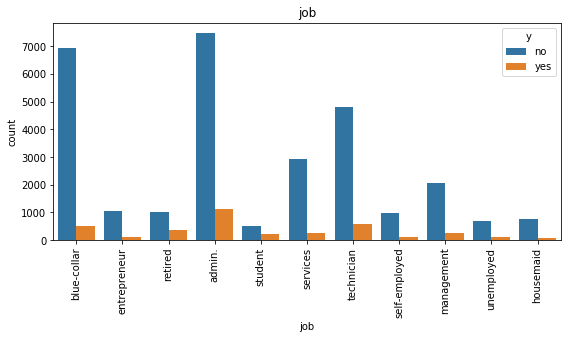

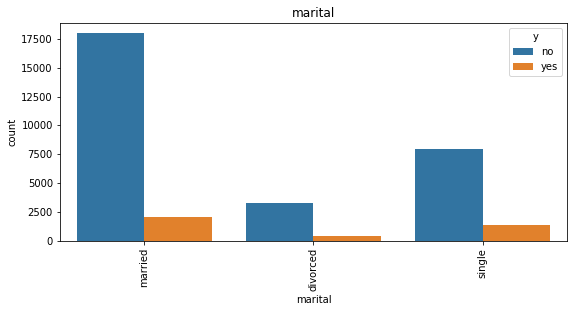

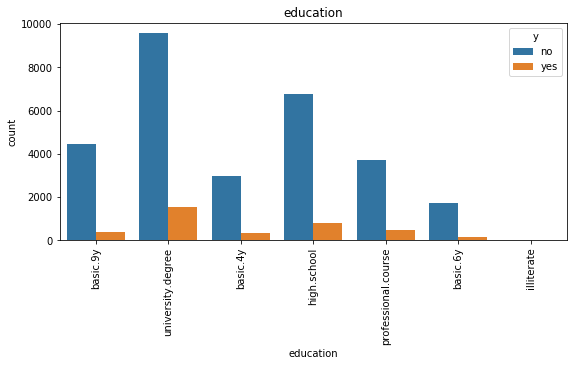

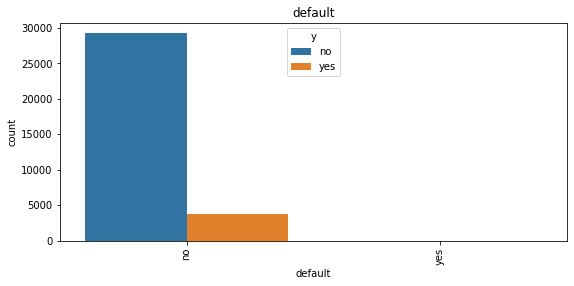

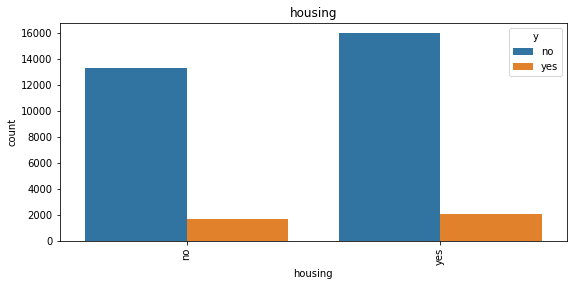

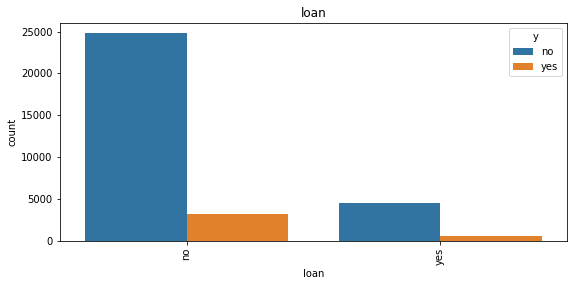

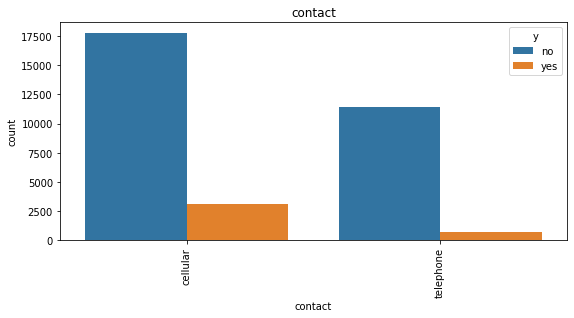

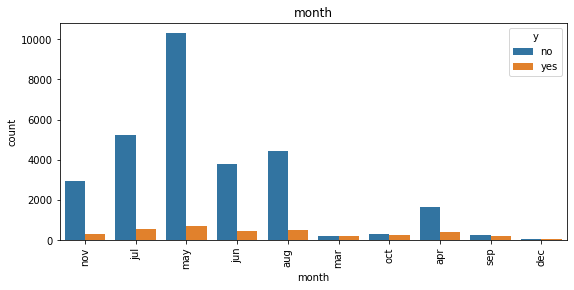

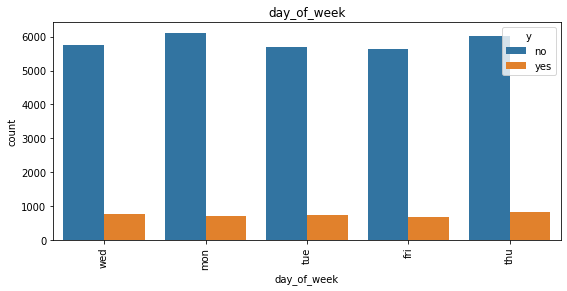

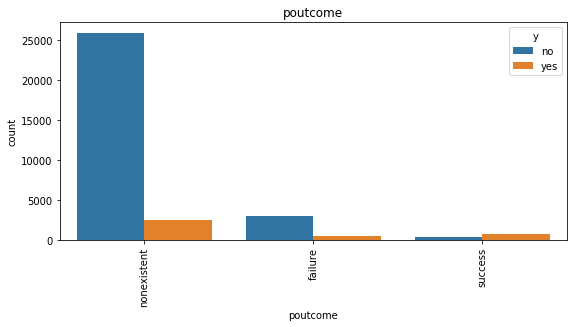

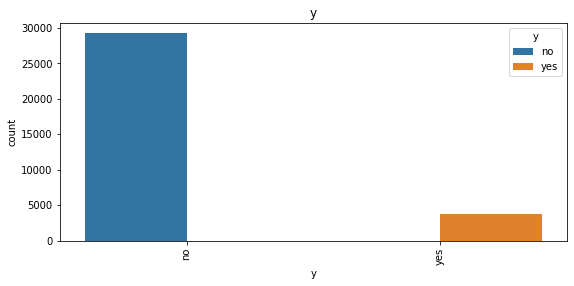

In [26]:
#Bivariate - relation of different categorical features with TARGET variable

for column in categorical_col:
    plt.figure(figsize=(20,4))
    plt.subplot(121)
    sns.countplot(x=df[column],hue=df['y'],data=df)
    plt.title(column)    
    plt.xticks(rotation=90)

### Observations:

- The common traits seen for customers who have subscribed for the term deposit are :
    - Customers having administrative jobs form the majority amongst those who have subscirbed to the term deposit with technicians being the second majority.
    - They are married 
    - They hold a university degree
    - They do not hold a credit in default
    - Housing loan doesn't seem a priority to check for since an equal number of customers who have and have not subscribed to it seem to have subscribed to the term deposit.
    - Cell-phones should be the preferred mode of contact for contacting customers.

## Label encoding categorical columns

In [27]:
le = LabelEncoder()

for i in categorical_col:
    try:
        df[i] = le.fit_transform(df[i])
    except:
        print('Error encoding '+i)

### Modeling with different Machine Learning Algorithms

Since we have label encoded our categorical variables, our data is now ready for applying machine learning algorithms. 

There are many Classification algorithms are present in machine learning, which are used for different classification applications. Some of the main classification algorithms are as follows-
- Logistic Regression
- DecisionTree Classifier
- RandomForest Classfier
- XGBClassifier
- GradientBoostingClassifier

We will be using 'roc_auc' metrics.

In [28]:
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

X_train,X_val,y_train,y_val = train_test_split(X,y,test_size=0.2,random_state=42)

In [29]:
#Defining functions to obtain model report

def generate_model_report(y_actual, y_predicted):
    print("Accuracy = " , accuracy_score(y_actual, y_predicted))
    print("Precision = " ,precision_score(y_actual, y_predicted))
    print("Recall = " ,recall_score(y_actual, y_predicted))
    print("F1 Score = " ,f1_score(y_actual, y_predicted))
    print("Classification report = ", classification_report(y_actual,y_predicted))
    pass

## Model 1: Logistic Regression

In [30]:
lg_clf = LogisticRegression()

lg_clf.fit(X_train,y_train)

lg_clf_train_score = lg_clf.score(X_train,y_train)
print('LR Train score: %.2f'% lg_clf_train_score)

lg_clf_val_score = lg_clf.score(X_val, y_val)
print('LR Validation score: %.2f'% lg_clf_val_score)

y_pred = lg_clf.predict(X_val)

LR Train score: 0.90
LR Validation score: 0.90


In [31]:
generate_model_report(y_val, y_pred)

Accuracy =  0.8961906207315222
Precision =  0.6041666666666666
Recall =  0.3372093023255814
F1 Score =  0.4328358208955223
Classification report =                precision    recall  f1-score   support

           0       0.92      0.97      0.94      5815
           1       0.60      0.34      0.43       774

    accuracy                           0.90      6589
   macro avg       0.76      0.65      0.69      6589
weighted avg       0.88      0.90      0.88      6589



Auc score: 0.9202028079390154


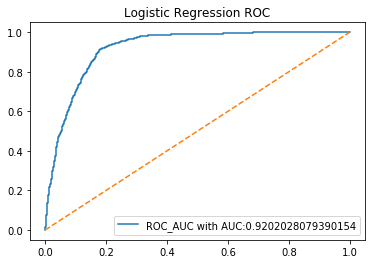

In [32]:
y_pred_proba = lg_clf.predict_proba(X_val)[:, 1]
fpr, tpr, thresholds = metrics.roc_curve(y_val, y_pred_proba)

auc = metrics.roc_auc_score(y_val, y_pred_proba)
print('Auc score:', auc)

plt.title('Logistic Regression ROC')
plt.plot(fpr,tpr,label="ROC_AUC with AUC:"+str(auc))
plt.plot([0, 1], [0, 1], linestyle='--')
plt.legend(loc=4)
plt.show()

## Model 2: Decision Tree

In [33]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import datasets
from IPython.display import Image  
from sklearn import tree
import pydotplus
import graphviz
from io import StringIO
from sklearn.tree import export_graphviz
from sklearn import tree
from sklearn import metrics
from IPython.display import Image
import pydotplus
from sklearn.datasets import load_iris
from sklearn import tree
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO

In [34]:
dt_clf = DecisionTreeClassifier(criterion = 'gini', max_depth = 4)

dt_clf.fit(X_train, y_train)

dt_clf_train_score = dt_clf.score(X_train,y_train)
print('LR Train score: %.2f'% dt_clf_train_score)

dt_clf_val_score = dt_clf.score(X_val, y_val)
print('LR Validation score: %.2f'% dt_clf_val_score)

y_pred = dt_clf.predict(X_val)

LR Train score: 0.91
LR Validation score: 0.90


In [35]:
generate_model_report(y_val, y_pred)

Accuracy =  0.9034754894521172
Precision =  0.6778350515463918
Recall =  0.3397932816537468
F1 Score =  0.4526678141135973
Classification report =                precision    recall  f1-score   support

           0       0.92      0.98      0.95      5815
           1       0.68      0.34      0.45       774

    accuracy                           0.90      6589
   macro avg       0.80      0.66      0.70      6589
weighted avg       0.89      0.90      0.89      6589



Auc score: 0.9084685867654934


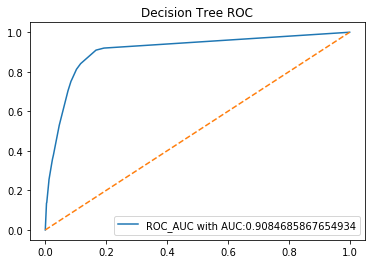

In [36]:
y_pred_proba = dt_clf.predict_proba(X_val)[:, 1]
fpr, tpr, thresholds = metrics.roc_curve(y_val,  y_pred_proba)

auc = metrics.roc_auc_score(y_val, y_pred_proba)
print('Auc score:', auc)

plt.title('Decision Tree ROC')
plt.plot(fpr,tpr,label="ROC_AUC with AUC:"+str(auc))
plt.plot([0, 1], [0, 1], linestyle='--')
plt.legend(loc=4)
plt.show()

[Text(465.0, 815.4, 'nr.employed <= 5087.65\ngini = 0.198\nsamples = 26353\nvalue = [23415, 2938]\nclass = term_deposit_yes'),
 Text(232.5, 634.2, 'duration <= 172.5\ngini = 0.492\nsamples = 3198\nvalue = [1799, 1399]\nclass = term_deposit_yes'),
 Text(116.25, 453.0, 'duration <= 124.5\ngini = 0.286\nsamples = 1209\nvalue = [1000, 209]\nclass = term_deposit_yes'),
 Text(58.125, 271.80000000000007, 'poutcome <= 1.5\ngini = 0.174\nsamples = 729\nvalue = [659, 70]\nclass = term_deposit_yes'),
 Text(29.0625, 90.60000000000002, 'gini = 0.131\nsamples = 639\nvalue = [594, 45]\nclass = term_deposit_yes'),
 Text(87.1875, 90.60000000000002, 'gini = 0.401\nsamples = 90\nvalue = [65, 25]\nclass = term_deposit_yes'),
 Text(174.375, 271.80000000000007, 'poutcome <= 1.5\ngini = 0.411\nsamples = 480\nvalue = [341, 139]\nclass = term_deposit_yes'),
 Text(145.3125, 90.60000000000002, 'gini = 0.365\nsamples = 383\nvalue = [291, 92]\nclass = term_deposit_yes'),
 Text(203.4375, 90.60000000000002, 'gini = 

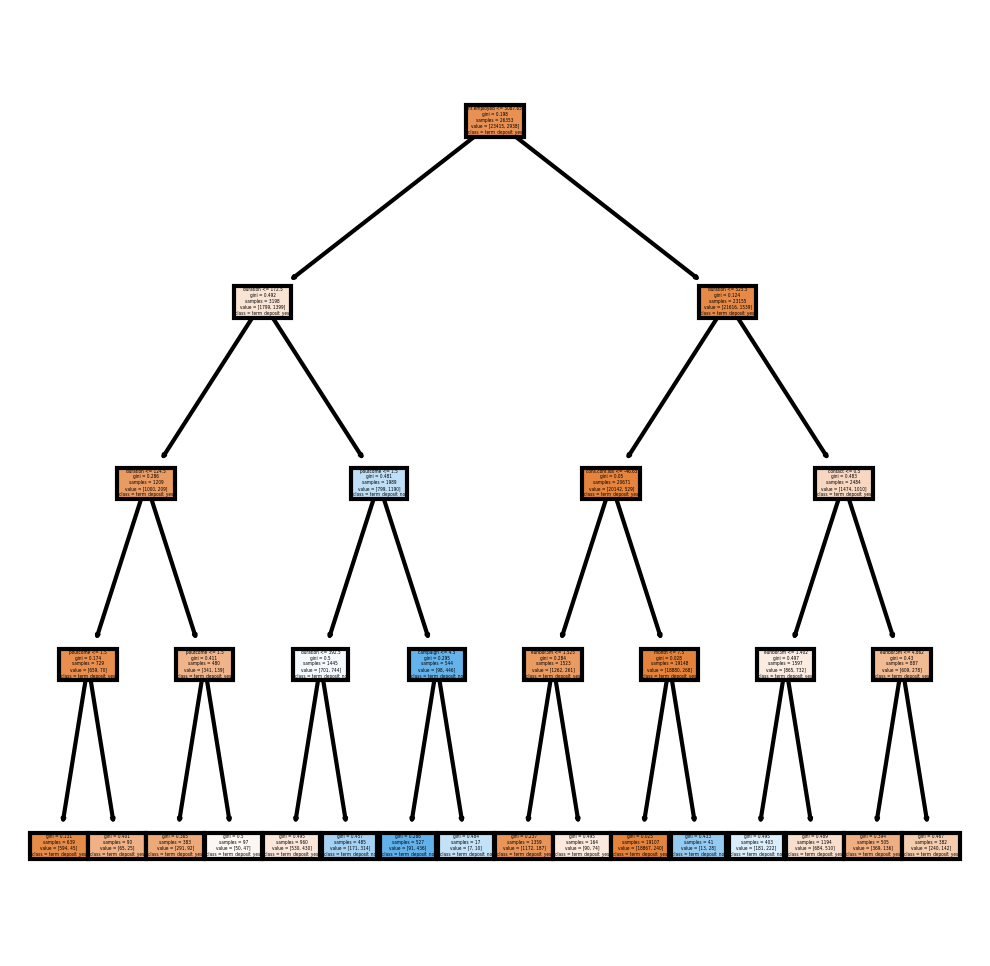

In [37]:
#Plotting decision tree

fn = list(df.columns)
cn = ['term_deposit_yes','term_deposit_no']

fig, axes = plt.subplots(nrows = 1, ncols = 1,figsize = (4,4), dpi=300)

tree.plot_tree(dt_clf, feature_names=fn, class_names=cn, filled=True)

## Model 3: Random Forest

In [38]:
rf_clf = RandomForestClassifier(n_estimators=100,n_jobs=100,random_state=0, min_samples_leaf=100)

rf_clf.fit(X_train, y_train)

rf_clf_train_score = rf_clf.score(X_train,y_train)
print('LR Train score: %.2f'% rf_clf_train_score)

rf_clf_val_score = rf_clf.score(X_val, y_val)
print('LR Validation score: %.2f'% rf_clf_val_score)

y_pred = rf_clf.predict(X_val)

LR Train score: 0.91
LR Validation score: 0.90


In [39]:
generate_model_report(y_val, y_pred)

Accuracy =  0.9024131127636971
Precision =  0.7471698113207547
Recall =  0.2558139534883721
F1 Score =  0.38113570741097214
Classification report =                precision    recall  f1-score   support

           0       0.91      0.99      0.95      5815
           1       0.75      0.26      0.38       774

    accuracy                           0.90      6589
   macro avg       0.83      0.62      0.66      6589
weighted avg       0.89      0.90      0.88      6589



Auc score: 0.9378765155605324


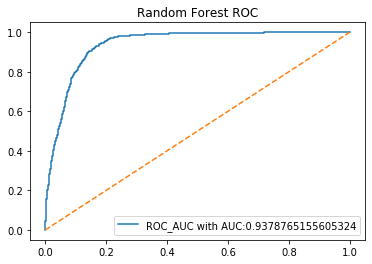

In [40]:
y_pred_proba = rf_clf.predict_proba(X_val)[:, 1]
fpr, tpr, thresholds = metrics.roc_curve(y_val,  y_pred_proba)

auc = metrics.roc_auc_score(y_val, y_pred_proba)
print('Auc score:', auc)

plt.title('Random Forest ROC')
plt.plot(fpr,tpr,label="ROC_AUC with AUC:"+str(auc))
plt.plot([0, 1], [0, 1], linestyle='--')
plt.legend(loc=4)
plt.show()

## 4. XGBoost

In [41]:
xgb_clf = XGBClassifier()

xgb_clf.fit(X_train, y_train)

xgb_clf_train_score = xgb_clf.score(X_train,y_train)
print('LR Train score: %.2f'% xgb_clf_train_score)

xgb_clf_val_score = xgb_clf.score(X_val, y_val)
print('LR Validation score: %.2f'% xgb_clf_val_score)

y_pred = xgb_clf.predict(X_val)

LR Train score: 0.97
LR Validation score: 0.90


In [42]:
generate_model_report(y_val, y_pred)

Accuracy =  0.9040825618455001
Precision =  0.6203389830508474
Recall =  0.4728682170542636
F1 Score =  0.5366568914956011
Classification report =                precision    recall  f1-score   support

           0       0.93      0.96      0.95      5815
           1       0.62      0.47      0.54       774

    accuracy                           0.90      6589
   macro avg       0.78      0.72      0.74      6589
weighted avg       0.90      0.90      0.90      6589



Auc score: 0.9446968434570666


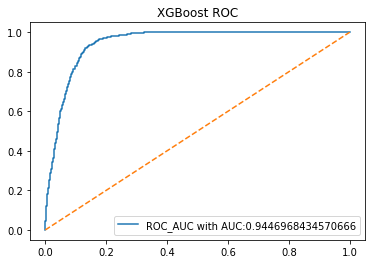

In [43]:
y_pred_proba = xgb_clf.predict_proba(X_val)[:, 1]
fpr, tpr, thresholds = metrics.roc_curve(y_val, y_pred_proba)

auc = metrics.roc_auc_score(y_val, y_pred_proba)
print('Auc score:', auc)

plt.title('XGBoost ROC')
plt.plot(fpr,tpr,label="ROC_AUC with AUC:"+str(auc))
plt.plot([0, 1], [0, 1], linestyle='--')
plt.legend(loc=4)
plt.show()

## 5. Gradient Boosting

In [44]:
gb_clf = GradientBoostingClassifier()

gb_clf.fit(X_train, y_train)

gb_clf_train_score = gb_clf.score(X_train,y_train)
print('LR Train score: %.2f'% gb_clf_train_score)

gb_clf_val_score = gb_clf.score(X_val, y_val)
print('LR Validation score: %.2f'% gb_clf_val_score)

y_pred = gb_clf.predict(X_val)

LR Train score: 0.92
LR Validation score: 0.91


In [45]:
generate_model_report(y_val, y_pred)

Accuracy =  0.9057520109273031
Precision =  0.6570841889117043
Recall =  0.4134366925064599
F1 Score =  0.507533703409992
Classification report =                precision    recall  f1-score   support

           0       0.93      0.97      0.95      5815
           1       0.66      0.41      0.51       774

    accuracy                           0.91      6589
   macro avg       0.79      0.69      0.73      6589
weighted avg       0.89      0.91      0.90      6589



Auc score: 0.9444955463572112


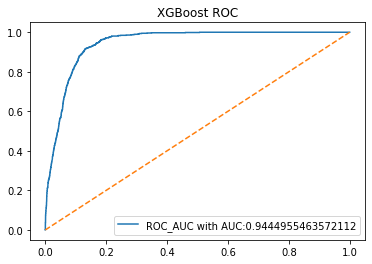

In [46]:
y_pred_proba = gb_clf.predict_proba(X_val)[:,1]
fpr, tpr, thresholds = metrics.roc_curve(y_val, y_pred_proba)

auc = metrics.roc_auc_score(y_val, y_pred_proba)
print('Auc score:', auc)

plt.title('XGBoost ROC')
plt.plot(fpr,tpr,label="ROC_AUC with AUC:"+str(auc))
plt.plot([0, 1], [0, 1], linestyle='--')
plt.legend(loc=4)
plt.show()

###  Feature selection using RFE
In this task let's use Recursive Feature Elimination for selecting the best features. RFE is a wrapper method that uses the model to identify the best features. 

- For the below task, we have inputted 8 feature. You can change this value and input the number of features you want to retain for your model

In [47]:
models = LogisticRegression()

rfe = RFE(models,8)
rfe = rfe.fit(X,y)

feature_ranking = pd.Series(rfe.ranking_, index=X.columns)
plt.show()

print('Features  to be selected for Logistic Regression model are:')
print(feature_ranking[feature_ranking.values==1].index.tolist())

Features  to be selected for Logistic Regression model are:
['marital', 'education', 'contact', 'day_of_week', 'poutcome', 'emp.var.rate', 'cons.conf.idx', 'euribor3m']


In [48]:
models = RandomForestClassifier()

rfe = RFE(models,8)
rfe = rfe.fit(X,y)

feature_ranking = pd.Series(rfe.ranking_, index=X.columns)
plt.show()

print('Features  to be selected for Random Forest model are:')
print(feature_ranking[feature_ranking.values==1].index.tolist())

Features  to be selected for Random Forest model are:
['age', 'job', 'education', 'day_of_week', 'duration', 'campaign', 'euribor3m', 'nr.employed']


In [49]:
models = XGBClassifier()

rfe = RFE(models,8)
rfe = rfe.fit(X,y)

feature_ranking = pd.Series(rfe.ranking_, index=X.columns)
plt.show()

print('Features  to be selected for XGBoost model are:')
print(feature_ranking[feature_ranking.values==1].index.tolist())

Features  to be selected for XGBoost model are:
['contact', 'duration', 'poutcome', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']


## Random forest feature selection

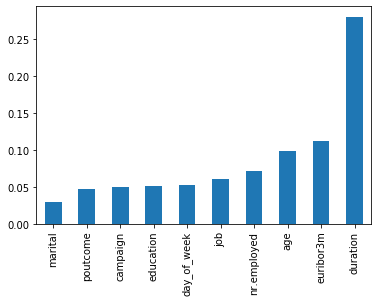

In [50]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

rfc = RandomForestClassifier(random_state=42)
rfc.fit(X_train, y_train)

y_pred = rfc.predict(X_test)

rfc_importances = pd.Series(rfc.feature_importances_, index=X.columns).sort_values().tail(10)
rfc_importances.plot(kind='bar')
plt.show()

# Grid-Search & Hyperparameter Tuning 

Hyperparameters are function attributes that we have to specify for an algorithm. By now, you should be knowing that grid search is done to find out the best set of hyperparameters for your model.  

### Grid Search for Random Forest

In the below task, we write a code that performs hyperparameter tuning for a random forest classifier. We have used the hyperparameters `max_features`, `max_depth` and `criterion` for this task.

In [51]:
from sklearn.model_selection import cross_val_score

X_train,X_val,y_train,y_val = train_test_split(X,y, test_size=0.3, random_state=42, stratify=y)

parameters = { 
'max_features': ['auto', 'sqrt', 'log2'],
'max_depth' : [4,5,6,7,8],
'criterion' :['gini', 'entropy']
             }

grid = GridSearchCV(rfc, param_grid = parameters)
grid.fit(X_train,y_train)
grid_predict = grid.predict(X_val)

score = cross_val_score(grid.best_estimator_, X_train, y_train)
print(score)

[0.90546401 0.91305291 0.91153513 0.9121856  0.90522663]


In [52]:
best_parameters = grid.best_params_
print('Best Parameters are:', best_parameters)

Best Parameters are: {'criterion': 'gini', 'max_depth': 8, 'max_features': 'auto'}


## Imbalanced data 

We use SMOTE (oversampling)

In [53]:
minority_class_len = len(df[df.y == 1])
print(minority_class_len)

3712


In [54]:
majority_class_len = len(df[df.y == 0])
print(majority_class_len)

29230


In [55]:
df['y'].value_counts()

0    29230
1     3712
Name: y, dtype: int64

In [56]:
from imblearn.over_sampling import SMOTE
from yellowbrick.classifier import roc_auc

              precision    recall  f1-score   support

           0       0.98      0.88      0.92      8743
           1       0.47      0.83      0.60      1140

    accuracy                           0.87      9883
   macro avg       0.72      0.85      0.76      9883
weighted avg       0.92      0.87      0.89      9883

[[7673 1070]
 [ 192  948]]


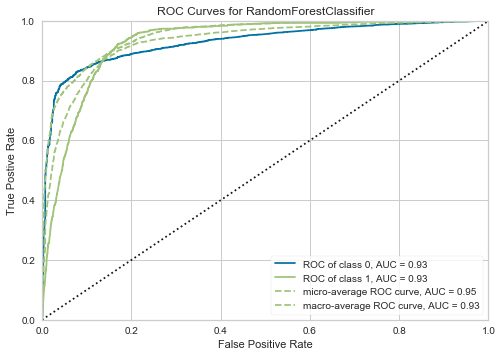

In [57]:
X_train,X_val,y_train,y_val = train_test_split(X,y, test_size=0.3, random_state=42)

def grid_search_random_forest_best(dataframe,target):
    
    # splitting the data
    x_train,x_val,y_train,y_val = train_test_split(dataframe,target, test_size=0.3, random_state=42)
    
    # Applying Smote on train data for dealing with class imbalance
    smote = SMOTE()
    
    X_sm, y_sm =  smote.fit_sample(x_train, y_train)
    
    rfc = RandomForestClassifier(n_estimators=11, max_features='auto', max_depth=8, criterion='entropy',random_state=42)
    
    rfc.fit(X_sm, y_sm)
    y_pred = rfc.predict(x_val)
    print(classification_report(y_val, y_pred))
    print(confusion_matrix(y_val, y_pred))
    visualizer = roc_auc(rfc,X_sm,y_sm,x_val,y_val)


grid_search_random_forest_best(X,y)

### Applying defined function on the best features obtained using Random Forest

              precision    recall  f1-score   support

           0       0.98      0.85      0.91      8743
           1       0.44      0.89      0.59      1140

    accuracy                           0.86      9883
   macro avg       0.71      0.87      0.75      9883
weighted avg       0.92      0.86      0.88      9883

[[7459 1284]
 [ 131 1009]]


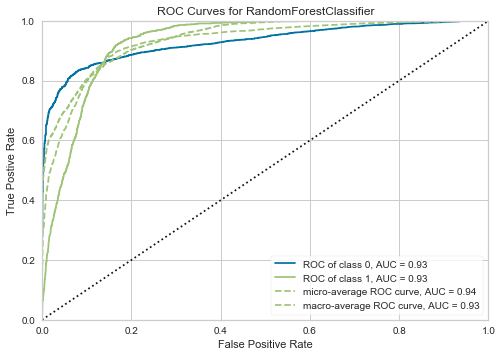

In [58]:
grid_search_random_forest_best(X[['marital','poutcome','campaign','education','day_of_week','job','nr.employed','age','duration','euribor3m']],y)

### GridSearch on Logistic Regression model

In [59]:
X_train,X_val,y_train,y_val = train_test_split(X,y, test_size=0.3, random_state=42)
  
smote = SMOTE()
X_samp, y_samp =  smote.fit_sample(X_train, y_train)

lg = LogisticRegression()

parameters = {'C':np.logspace(-5, 8, 15)}

grid = GridSearchCV(lg, param_grid = parameters)
grid.fit(X_samp, y_samp)

y_pred = grid.predict(X_val)

              precision    recall  f1-score   support

           0       0.98      0.82      0.90      8743
           1       0.40      0.88      0.55      1140

    accuracy                           0.83      9883
   macro avg       0.69      0.85      0.72      9883
weighted avg       0.91      0.83      0.86      9883

[[7205 1538]
 [ 135 1005]]


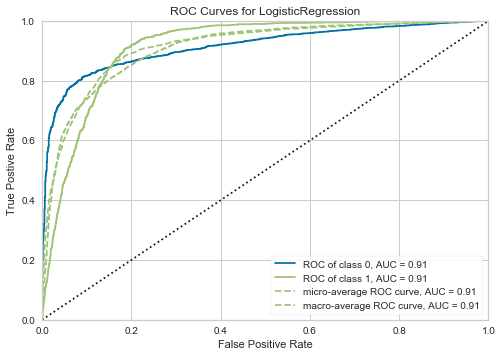

In [60]:
print(classification_report(y_val, y_pred))
print(confusion_matrix(y_val, y_pred))
visualizer = roc_auc(lg,X_samp,y_samp,X_val,y_val)

### Ensembling with voting classifier

In [61]:
from sklearn.ensemble import VotingClassifier

X_train,X_val,y_train,y_val = train_test_split(X, y, test_size=0.3, random_state=42)

smote = SMOTE()
X_samp, y_samp =  smote.fit_sample(X_train, y_train)

m1 = RandomForestClassifier()
m2 = GradientBoostingClassifier()
m3 = LogisticRegression()

model = VotingClassifier(estimators=[('rf', m1), ('xgb', m2 ), ('lg', m3)], voting='soft')
model.fit(X_samp,y_samp)

y_pred = model.predict(X_val)

              precision    recall  f1-score   support

           0       0.98      0.88      0.93      8743
           1       0.48      0.84      0.61      1140

    accuracy                           0.88      9883
   macro avg       0.73      0.86      0.77      9883
weighted avg       0.92      0.88      0.89      9883

[[7712 1031]
 [ 185  955]]


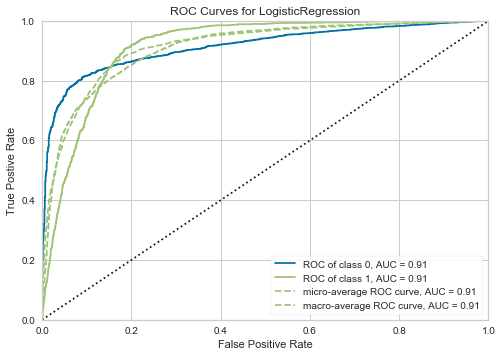

In [62]:
print(classification_report(y_val, y_pred))
print(confusion_matrix(y_val, y_pred))
visualizer = roc_auc(lg,X_samp,y_samp,X_val,y_val)

## Prediction on Validation dataset

In [63]:
#Actual validation file
val = pd.read_csv('C:\\Users\\Mrunal\\Documents\\Bank Marketing Analysis\\test.csv')

#Storing ID column
Id = val[['Id']]

# Preprocessed Test File
val = pd.read_csv('C:\\Users\\Mrunal\\Documents\\Bank Marketing Analysis\\test_preprocessed.csv')
val.drop('Id',1,inplace=True)
val.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,32,4,0,6,0,0,0,0,3,3,131,5,1,1.4,93.918,-42.7,4.961,5228.1
1,37,10,3,6,0,0,0,0,4,3,100,1,1,-2.9,92.963,-40.8,1.262,5076.2
2,55,5,0,5,1,2,0,0,3,2,131,2,1,-1.7,94.215,-40.3,0.810,5017.5
3,44,2,1,0,1,0,0,1,4,3,48,2,1,1.4,94.465,-41.8,4.961,5228.1
4,28,0,2,3,0,0,0,0,5,0,144,2,1,-1.8,92.843,-47.1,1.531,5099.1


In [64]:
smote = SMOTE()

X_samp, y_samp = smote.fit_sample(X_train, y_train)

log_reg = LogisticRegression()

parameters = {'C':np.logspace(-5, 8, 15)}

grid_search = GridSearchCV(log_reg, param_grid=parameters)

grid_search.fit(X_samp, y_samp)
y_pred = grid_search.predict(val)

In [65]:
prediction = pd.DataFrame(y_pred,columns=['y'])
submission = pd.concat([Id,prediction['y']],1)

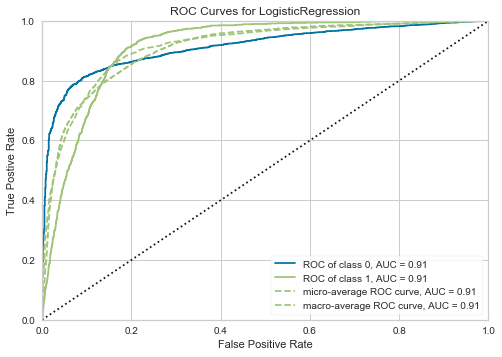

In [66]:
visualizer = roc_auc(log_reg,X_samp,y_samp,X_val,y_val)

In [68]:
submission.to_csv('C:\\Users\\Mrunal\\Documents\\Bank Marketing Analysis\\finalsubmission.csv',index=False)